# Introductory Analysis

In [1]:
from pathlib import *
import sqlalchemy as sa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import axelrod as axl
%matplotlib inline

Size of Database as of writing: 

In [2]:
database_management_sys = sa.create_engine("sqlite:///../database-code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])

(825700, 159)

In [3]:
se_folk_thm_data.head()

,experiment_number,number_of_players,tournament_player_set,player_strategy_name,is_long_run_time,is_stochastic,memory_depth_of_strategy,prob_of_game_ending,payoff_matrix,num_of_repetitions,num_of_equilibria,nash_equilibria,least_prob_of_defection,greatest_prob_of_defection,noise,warning_message
0,0,2,0,Inverse,False,True,Inf,0.001000,3. 0.99159429 1.03362284 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
1,0,2,0,Defector,False,False,0,0.001000,3. 0.99159429 1.03362284 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
2,1,2,0,Inverse,False,True,Inf,0.011081,3. 0.95530245 1.1787902 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
3,1,2,0,Defector,False,False,0,0.011081,3. 0.95530245 1.1787902 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
4,2,2,0,Inverse,False,True,Inf,0.021162,3. 0.9212484 1.31500641 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None


### Summary Statistics

In [4]:
se_folk_thm_data.describe()

,experiment_number,number_of_players,tournament_player_set,prob_of_game_ending,num_of_repetitions,num_of_equilibria,least_prob_of_defection,greatest_prob_of_defection,noise
count,825700.000000,825700.000000,825700.000000,825700.000000,825700.0,823823.000000,823823.000000,823823.000000,825700.000000
mean,107364.481228,5.435509,97.105850,0.500000,500.0,1.913727,0.342275,0.459722,0.498547
std,46880.538807,1.726832,42.619612,0.290993,0.0,2.022014,0.469061,0.489564,0.316301
min,0.000000,2.000000,0.000000,0.001000,500.0,1.000000,0.000000,0.000000,0.000000
25%,72231.000000,4.000000,65.000000,0.250500,500.0,1.000000,0.000000,0.000000,0.200000
50%,114641.000000,6.000000,104.000000,0.500000,500.0,1.000000,0.000000,0.000000,0.500000
75%,147396.000000,7.000000,133.000000,0.749500,500.0,3.000000,1.000000,1.000000,0.800000
max,175399.000000,8.000000,159.000000,0.999000,500.0,39.000000,1.000000,1.000000,1.000000


The average number of players per tournament in the experiment is 5 players.

The probabilities of the game ending is centred around p = 0.5.

The average number of Nash equilibria calculated from the payoff matrices is 2, with the majority of games having 1 - 3 equilibria. However, what is interesting here is that at least one game obtained 39 equilibria (as can be seen from the table above). A further search regarding this will be executed later.

The mean for the least probability of defection in any one game is 0.342275 and for the greatest probability of defection it is 0.459722. However, both probabilities have yielded a value of 0 and 1 over the experiment. 

### Strategy Statistics

In [42]:
strategy_data = se_folk_thm_data[["tournament_player_set", "player_strategy_name", "is_stochastic", "is_long_run_time", "memory_depth_of_strategy"]].drop_duplicates()
strategy_data.head()

,tournament_player_set,player_strategy_name,is_stochastic,is_long_run_time,memory_depth_of_strategy
0,0,Inverse,True,False,Inf
1,0,Defector,False,False,0
2200,1,ALLCorALLD,True,False,1
2201,1,Defector,False,False,0
4400,2,Handshake,False,False,Inf


In [7]:
strategy_counts = strategy_data["player_strategy_name"].value_counts()
strategy_counts.head(), strategy_counts.tail()

(Defector                             160
 ZD-GEN-2: 0.125, 0.5, 3                9
 Tideman and Chieruzzi                  8
 Cycler DC                              7
 General Soft Grudger: n=1,d=4,c=2      7
 Name: player_strategy_name, dtype: int64, WmAdams                   1
 Evolved ANN               1
 Soft Go By Majority: 5    1
 Anti Tit For Tat          1
 Appeaser                  1
 Name: player_strategy_name, dtype: int64)

In [8]:
len(strategy_counts[strategy_counts == 1]), len(strategy_data["player_strategy_name"].drop_duplicates())

(38, 200)

Excluding the defector, the strategy which appeared the most (9 times) is ZD-GEN-2: 0.125, 0.5, 3; followed closely by Tideman and Chieruzzi with 7 times. On the other hand 38 out of the 200 strategies executed in this experiment appeared only once. Next, these counts will be plotted with regards to the players characteristics to see if there is any overarching bias that needs to be taken into account.

In [9]:
strategy_data["is_stochastic"].value_counts()

False    551
True     204
Name: is_stochastic, dtype: int64

In [10]:
strategy_data["is_long_run_time"].value_counts()

False    755
Name: is_long_run_time, dtype: int64

In [11]:
strategy_data["memory_depth_of_strategy"].value_counts()

Inf    366
0      166
1      104
2       35
5       26
3       22
10      11
200      6
11       4
6        4
20       3
40       3
4        2
12       2
8        1
Name: memory_depth_of_strategy, dtype: int64

The majority of strategies participating in this experiment had either an infinite, one or no memory depth.

In [69]:
strategy_counts_no_defect = strategy_counts.drop("Defector")
strategy_counts_no_defect.head(), len(strategy_counts_no_defect)

(ZD-GEN-2: 0.125, 0.5, 3              9
 Tideman and Chieruzzi                8
 Cycler DC                            7
 General Soft Grudger: n=1,d=4,c=2    7
 ZD-GTFT-2: 0.25, 0.5                 7
 Name: player_strategy_name, dtype: int64, 199)

In [66]:
labels = []
for player in strategy_counts_no_defect.index:
    stochastic_player = pd.Series(strategy_data[strategy_data["player_strategy_name"] == player]["is_stochastic"])
    stochastic_player.index = range(len(stochastic_player))
    stochastic_player = stochastic_player[0]
    labels.append(stochastic_player)

In [68]:
len(labels)

199

In [73]:
player_stochastic_dict = {"player_strategy_name" : strategy_counts_no_defect.index,
                            "strategy_counts" : strategy_counts_no_defect.values,
                            "is_stochastic" : labels}

player_stochastic_data = pd.DataFrame(player_stochastic_dict)

In [75]:
player_stochastic_data.head()

,player_strategy_name,strategy_counts,is_stochastic
0,"ZD-GEN-2: 0.125, 0.5, 3",9,True
1,Tideman and Chieruzzi,8,False
2,Cycler DC,7,False
3,"General Soft Grudger: n=1,d=4,c=2",7,False
4,"ZD-GTFT-2: 0.25, 0.5",7,True


In [76]:
stochastic_player_data = player_stochastic_data[player_stochastic_data["is_stochastic"] == True]
deterministic_player_data = player_stochastic_data[player_stochastic_data["is_stochastic"] == False]
stochastic_player_data.head(), deterministic_player_data.head()

(                  player_strategy_name  strategy_counts  is_stochastic
 0              ZD-GEN-2: 0.125, 0.5, 3                9           True
 4                 ZD-GTFT-2: 0.25, 0.5                7           True
 6                           GTFT: 0.33                6           True
 7   Meta Winner Memory One: 34 players                6           True
 11                 Feld: 1.0, 0.5, 200                6           True,
                 player_strategy_name  strategy_counts  is_stochastic
 1              Tideman and Chieruzzi                8          False
 2                          Cycler DC                7          False
 3  General Soft Grudger: n=1,d=4,c=2                7          False
 5                 DoubleResurrection                6          False
 8                          Fortress3                6          False)

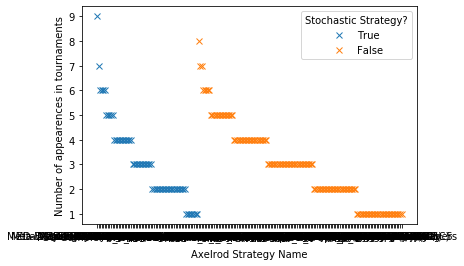

In [79]:
graph = plt.figure()
axes = graph.add_subplot(1, 1, 1)
axes.set_xlabel("Axelrod Strategy Name")
axes.set_ylabel("Number of appearences in tournaments")
axes.plot(stochastic_player_data["player_strategy_name"], stochastic_player_data["strategy_counts"], "x", label="True")
axes.plot(deterministic_player_data["player_strategy_name"], deterministic_player_data["strategy_counts"], "x", label="False")
axes.legend(title="Stochastic Strategy?")
plt.show()